In [30]:
#import relevant packages
import numpy as np 
import time
import matplotlib
from matplotlib import pyplot as plt
import random

***Task Scheduler***

In [31]:
#adapted from CS110 Session 13 - [7.2] Heaps and priority queues

class MaxHeapq:
    """ 
    A class that implements properties and methods that support a max priority queue data structure

	  Attributes
	  ----------
	  heap : arr
	      A Python list where key values in the max heap are stored
	  heap_size: int
	      An integer counter of the number of keys present in the max heap
	  """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """  
        self.heap       = []
        self.heap_size  = 0

        
    def left(self, i):
        """
        Takes the index of the parent node and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None

        """

        if key.priority_value < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        #switches parent and child if the paraent is smaller than the child
        while i > 0 and self.heap[self.parent(i)].priority_value < self.heap[i].priority_value:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            #switches the current node to the index of the parent
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        #compares the left and right tasks   
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        #considers the largest task on left
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        #considers the largest task on right
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            #Organizes the heap based on prioratized task
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        returns the largest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        #removes the task
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

    def print_heap(self):
        """
        prints all the tasks with their descriptions and priority values in the heap
        
        Parameters
        ----------
        None

        Returns
        ----------
  
        """

        for i in self.heap:
            print("\n",f'Task: {i.description} and its priority value is {10000/(i.end_time - i.duration)+1}')
     
#Code taken from Session 7.2: Heaps and priority queues
#The code I solved with my group was mainly utilized 
#with attribute changes and changes to use MaxHeapq instead of heapq module. 

class Task:
    """
    - id: Task id (a reference number)   
    - description: Task short description   
    - duration: Task duration in minutes   
    - dependencies: List of task ids that need to preceed this task  
    - status: Current status of the task     
   
    """
    #Initializes an instance of Task
    def __init__(self, id, description, duration, dependencies, end_time,status="N"):
        """
        Parameters
        ----------
        None
        """  
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.end_time = end_time
        self.priority_value = self.priority_calculator(self.end_time, self.duration)

    def  priority_calculator(self, end_time, duration):
        """
        returns the priority value of a task
        
        Parameters
        ----------
        end_time: int
                  the ending time of a task

        duration: int
                  the duration of a task

        Returns
        ----------
        int
            the priority value of the task
        """
        return 10/ (end_time - duration)+1

    def __lt__(self, other):
        """
        check if a task has a greater priority value than a different task
        
        Parameters
        ----------
        other
            class instance
            a different task

        Returns
        ----------
        Boolean
            
        """
        return self.priority_value < other.priority_value    

#inherits the properties from MaxHeapq    
class TaskScheduler(MaxHeapq): 
    """
    A Simple Daily Task Scheduler Using Priority Queues
    """
    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        self.tasks = tasks
        super().__init__()

    #prints all the tasks and their dependencies
    def print_self(self):
        """
        prints all the task and their dependencies
        
        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        print("Tasks added to the simple scheduler:")
        print("--------------------------------------")
        for t in self.tasks:
            print(f"➡️'{t.description}', duration = {t.duration} mins.")   
            if len(t.dependencies)>0:
                print(f"\t ⚠️ This task depends on others!")     

     #removes a particular task from the dependencies list of other tasks       
    def remove_dependency(self, id):
        """
        removes a particular task from the dependencies list of other tasks     
        
        Parameters
        ----------
        id 
          task Id 

        Returns
        ----------
        None
        """
        
        for t in self.tasks:
            if t.id != id and id in t.dependencies:
                t.dependencies.remove(id)     

    #gets the tasks ready by checking for tasks that has not been started and without dependencies and pushing it into the heap   
    def get_tasks_ready(self): 
        """
        gets the tasks ready by checking for tasks that has not been started and without dependencies and pushing it into the heap
        
        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        for task in self.tasks:
            # If the task has no dependencies and is not yet in the queue
            if task.status == self.NOT_STARTED and not task.dependencies: 
                # Update status of the task
                task.status = self.IN_PRIORITY_QUEUE 
                # Push task into the priority queue
                self.heappush(task)
                
    
    #checks for unscheduled tasks (tasks whose started is "NOT_STARTED")
    def check_unscheduled_tasks(self):
        """
        returns the largest key in the max priority queue and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        """
        returns the time in the hour minute format
        
        Parameters
        ----------
        time
            int
            time in minutes

        Returns
        ----------
        string
            time in the hour minute format
        """
        return f"{time//60}h{time%60:02d}"
    
    #runs the task scheduler
    def run_task_scheduler(self, starting_time):
        """
        runs the tasck scheduler by popping items from the heap and running 
        the get task ready function and the remove dependency function
        
        Parameters
        ----------
        starting_time
                    int
                    starting time of the task scheduler

        Returns
        ----------
        None
        """

        descriptions=[]
        current_time = starting_time
        print("Running a simple scheduler:\n")
        while self.check_unscheduled_tasks() or self.heap:
            # Identify tasks that are ready to execute 
            # (those without dependencies) and 
            # push them into the priority queue
            if self.check_unscheduled_tasks():
              self.get_tasks_ready()
            #Check for tasks in the priority queue
            if len(self.heap) > 0 :
                # get the task on top of the priority queue        
                task =  self.heappop()
                descriptions.append(task.description)
                print(f"🕰t={self.format_time(current_time)}")
                print(f"\tstarted '{task.description}' for {task.duration} mins..., with a priority value of {round(10000/(task.end_time - task.duration)+1,1)}")
                current_time += task.duration            
                print(f"\t✅ t={self.format_time(current_time)}, task completed!") 
                # If the task is done, remove it from the dependency list 
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
        total_time = current_time - starting_time             
        print(f"\n🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min!")
        return descriptions

In [32]:
#I have removed some initial tasks and changed some dependencies. 
#the code is working on by prioratizing dependencies
#dependencies act as the main priority which is also how I derived my priority values

start_scheduler = 8*60
#my tasks
task_0 = Task(id=0, description='8 am: Lab Work', 
         duration=180, dependencies=[],end_time= 300)
task_1 = Task(id=1, description='4 pm: Take a tour of National Taiwan Museum ', 
         duration=150, dependencies=[0],end_time= 480)
task_2 = Task(id=2, description='7 pm: Light Sky Lanterns at a festival', 
         duration=160, dependencies=[0,1],end_time= 600)
task_3 = Task(id=3, description='9:30 pm: Visit Taipei Night Market for Scallion pancakes', 
         duration=75, dependencies=[0,1,2],end_time= 650)
task_4 = Task(id=4, description='10 pm: Returning to the res-hall via a bus', 
         duration=30, dependencies=[0,1,3], end_time= 700 )
task_5 = Task(id=5, description='11 pm: Talking with Minervans ', 
         duration=60, dependencies=[0,1,4], end_time= 750)
task_6 = Task(id=6, description='11pm: Laundry', 
         duration=60, dependencies=[0,1,4], end_time= 800)

monday = [task_0 ,task_1, task_2, task_3,
         task_4, task_5, task_6]

task_scheduler = TaskScheduler(monday)
task_scheduler.run_task_scheduler(start_scheduler)


Running a simple scheduler:

🕰t=8h00
	started '8 am: Lab Work' for 180 mins..., with a priority value of 84.3
	✅ t=11h00, task completed!
🕰t=11h00
	started '4 pm: Take a tour of National Taiwan Museum ' for 150 mins..., with a priority value of 31.3
	✅ t=13h30, task completed!
🕰t=13h30
	started '7 pm: Light Sky Lanterns at a festival' for 160 mins..., with a priority value of 23.7
	✅ t=16h10, task completed!
🕰t=16h10
	started '9:30 pm: Visit Taipei Night Market for Scallion pancakes' for 75 mins..., with a priority value of 18.4
	✅ t=17h25, task completed!
🕰t=17h25
	started '10 pm: Returning to the res-hall via a bus' for 30 mins..., with a priority value of 15.9
	✅ t=17h55, task completed!
🕰t=17h55
	started '11 pm: Talking with Minervans ' for 60 mins..., with a priority value of 15.5
	✅ t=18h55, task completed!
🕰t=18h55
	started '11pm: Laundry' for 60 mins..., with a priority value of 14.5
	✅ t=19h55, task completed!

🏁 Completed all planned tasks in 11h55min!


['8 am: Lab Work',
 '4 pm: Take a tour of National Taiwan Museum ',
 '7 pm: Light Sky Lanterns at a festival',
 '9:30 pm: Visit Taipei Night Market for Scallion pancakes',
 '10 pm: Returning to the res-hall via a bus',
 '11 pm: Talking with Minervans ',
 '11pm: Laundry']

***Dynamic Programming Scheduler***

In [33]:
class Task_profit:
    """
    A shorter version of class Task but with profit for completing tasks.
    """

    def __init__(self, description, tasks, duration,profit):
        self.tasks = tasks
        self.description = description
        self.duration = duration
        self.profit = profit

    def task_details(self):
        '''
        It prints the deatils of the activities
        '''
        return (self.description, self.tasks, self.duration, self.profit)


def dynamic_scheduler(days, time_limit):
    """
    Dynamic programming alogrithm appraoch to return profit created by completing maximum tasks in a given time limit.
    
    Parameter
    --------------
    days: list
        a list containing the task for each day that need to be completed
    time_limit: int
        an integar for time limit for the week.
    
    Returns:
    --------------
    list
        optimal list of tasks, time run and the profit generated 
    """

    #time limit
    time = time_limit
    #profit for scheduler
    profit = 0
    #order tasks based on higher profit
    days = sorted(days, key = lambda i: i.profit, reverse = True)

    #create a table to store the results of subproblems
    table = [[0 for _ in range(time + 1)] for _ in range(len(days) + 1)]

    #iterate through each day
    for i in range(1, len(days) + 1):
        task_profit_obj = days[i - 1]
        curr_profit = task_profit_obj.profit
        curr_day_duration = 0

        #iterate through each task in the current day
        for j in task_profit_obj.tasks:
            task_obj = j
            curr_day_duration += task_obj.duration 

        #populate the table with the maximum profit that can be achieved
        #for each time limit and for each day
        for t in range(1, time + 1):
            if curr_day_duration <= t:
                table[i][t] = max(table[i - 1][t], table[i - 1][t - curr_day_duration] + curr_profit)
            else:
                table[i][t] = table[i - 1][t]

    #reconstruct the solution by starting from the last day and working backwards
    i = len(days)
    t = time
    dynamic = []
    while i > 0 and t > 0:
        if table[i][t] != table[i - 1][t]:
            dynamic.append([days[i - 1], curr_day_duration, curr_profit])
            t -= curr_day_duration
        i -= 1
    
    return dynamic[::-1]




In [34]:
#week's tasks:

monday = [Task(id=0, description='8 am: Lab Work', 
         duration=100, dependencies=[],end_time= 200), 
         Task(id=1, description='4 pm: Take a bus to Sky Lantern Festival', 
         duration=50, dependencies=[0],end_time= 300), 
         Task(id=2, description='7 pm: Light Sky Lanterns at a festival', 
         duration=160, dependencies=[0,1],end_time= 400),
         Task(id=3, description='9:30 pm: Visit Taipei Night Market for Scallion pancakes', 
         duration=75, dependencies=[0,1,2],end_time= 450),
         Task(id=4, description='10 pm: Returning to the res-hall via a bus', 
         duration=30, dependencies=[0,1,3], end_time= 450 )]

tuesday = [Task(id=0, description='8 am: Lab Work', 
         duration=60, dependencies=[],end_time= 200), 
         Task(id=1, description='4 pm: Take a tour of National Taiwan Museum ', 
         duration=100, dependencies=[0],end_time= 250), 
         Task(id=2, description='9:30 pm: Visit Taipei Night Market for Scallion pancakes', 
         duration=75, dependencies=[0,1],end_time= 300),
         Task(id=3, description='10 pm: Returning to the res-hall via a bus', 
         duration=30, dependencies=[0,1,2], end_time= 340 ),
         Task(id=4, description='11 pm: Talking with Minervans ', 
         duration=60, dependencies=[0,1,3], end_time= 400),
         Task(id=5, description='11pm: Laundry', 
         duration=60, dependencies=[0,1,3], end_time= 400)]

wednesday = [Task(id=0, description='8 am: Lab Work', 
         duration=100, dependencies=[],end_time= 200), 
         Task(id=1, description='4 pm: Take a tour of National Taiwan Museum ', 
         duration=50, dependencies=[0],end_time= 250), 
         Task(id=2, description='7 pm: Light Sky Lanterns at a festival', 
         duration=100, dependencies=[0,1],end_time= 250)]

thursday = [Task(id=0, description='8 am: Lab Work', 
         duration=180, dependencies=[],end_time= 200), 
         Task(id=1, description='11 pm: Talking with Minervans ', 
         duration=60, dependencies=[0], end_time= 330),
         Task(id=2, description='11pm: Laundry', 
         duration=60, dependencies=[0,1,], end_time= 350)]

friday = [Task(id=0, description='8 am: Lab Work', 
         duration=180, dependencies=[],end_time= 300), 
         Task(id=1, description='4 pm: Take a tour of National Taiwan Museum ', 
         duration=150, dependencies=[0],end_time= 300), 
         Task(id=2, description='11 pm: Talking with Minervans ', 
         duration=60, dependencies=[0,1], end_time= 400),
         Task(id=3, description='11pm: Laundry', 
         duration=60, dependencies=[0,1], end_time= 450)]

monday_tasks = Task_profit('Monday', monday, TaskScheduler(monday).run_task_scheduler(start_scheduler),100)
tuesday_tasks = Task_profit('Tuesday', tuesday, TaskScheduler(tuesday).run_task_scheduler(start_scheduler),150)
wednesday_tasks = Task_profit('Wednesday', wednesday, TaskScheduler(wednesday).run_task_scheduler(start_scheduler),50)
thursday_tasks = Task_profit('Thursday', thursday, TaskScheduler(thursday).run_task_scheduler(start_scheduler),250)
friday_tasks = Task_profit('Friday', friday, TaskScheduler(friday).run_task_scheduler(start_scheduler),220)
optimized_week_tasks = [monday_tasks,tuesday_tasks, wednesday_tasks, thursday_tasks,friday_tasks]



Running a simple scheduler:

🕰t=8h00
	started '8 am: Lab Work' for 100 mins..., with a priority value of 101.0
	✅ t=9h40, task completed!
🕰t=9h40
	started '4 pm: Take a bus to Sky Lantern Festival' for 50 mins..., with a priority value of 41.0
	✅ t=10h30, task completed!
🕰t=10h30
	started '7 pm: Light Sky Lanterns at a festival' for 160 mins..., with a priority value of 42.7
	✅ t=13h10, task completed!
🕰t=13h10
	started '9:30 pm: Visit Taipei Night Market for Scallion pancakes' for 75 mins..., with a priority value of 27.7
	✅ t=14h25, task completed!
🕰t=14h25
	started '10 pm: Returning to the res-hall via a bus' for 30 mins..., with a priority value of 24.8
	✅ t=14h55, task completed!

🏁 Completed all planned tasks in 6h55min!
Running a simple scheduler:

🕰t=8h00
	started '8 am: Lab Work' for 60 mins..., with a priority value of 72.4
	✅ t=9h00, task completed!
🕰t=9h00
	started '4 pm: Take a tour of National Taiwan Museum ' for 100 mins..., with a priority value of 67.7
	✅ t=10h40, task

In [35]:
#test case 1:
optimal_profit_dynamic = dynamic_scheduler(optimized_week_tasks, 5000)
for i in range(len(optimal_profit_dynamic)):
  print("Day:" + optimal_profit_dynamic[i][0].description + " | " + 'Running Time:' + str(optimal_profit_dynamic[i][1]) + " | " + 'Profit:' + str(optimal_profit_dynamic[i][2]))


Day:Thursday | Running Time:250 | Profit:50
Day:Friday | Running Time:250 | Profit:50
Day:Tuesday | Running Time:250 | Profit:50
Day:Monday | Running Time:250 | Profit:50
Day:Wednesday | Running Time:250 | Profit:50


***Greedy Algorithm Scheduler***

In [36]:
def greedy_scheduler(days, time_limit):
    """
    Greedy alogrithm appraoch to return profit created by completing maximum tasks in a given time limit.
    
    Parameter
    --------------
    days: list
        a list containing the task for each day that need to be completed
    time_limit: int
        an integar for time limit for the week.
    
    Returns:
    --------------
    list
        optimal list of tasks, time run and the profit generated 
    """

    #time limit
    time = time_limit
    #profit for scheduler
    profit = 0
    #order tasks based on higher profit
    days = sorted(days, key = lambda i: i.profit, reverse = True)

    #greedy schedule
    greedy = []
    
    for i in range(len(days)):
      task_profit_obj = days[i]
      curr_profit = task_profit_obj.profit
      #keeping track of current day's duration
      curr_day_duration = 0

      #Reduce time from time_limt when current day's task is completed 
      for j in task_profit_obj.tasks:
        task_obj = j
        curr_day_duration += task_obj.duration 
        time -= task_obj.duration
      
      #If we can finish the tasks during the time limit,
      #then increase the profit
      if curr_day_duration <= time:
        profit += curr_profit
        greedy.append([task_profit_obj, curr_day_duration, curr_profit])
  
    return greedy

    

In [37]:
#test case 1: large time constraint to complete all tasks
#to make changes in the profit we need to change the profit and tasks in the input

optimal_profit_greedy = greedy_scheduler(optimized_week_tasks, 2500)
for i in range(len(optimal_profit_greedy)):
  print("Day:" + optimal_profit_greedy[i][0].description + " | " + 'Running Time:' + str(optimal_profit_greedy[i][1]) + " | " + 'Profit:' + str(optimal_profit_greedy[i][2]))


Day:Thursday | Running Time:300 | Profit:250
Day:Friday | Running Time:450 | Profit:220
Day:Tuesday | Running Time:385 | Profit:150
Day:Monday | Running Time:415 | Profit:100
Day:Wednesday | Running Time:250 | Profit:50


In [38]:
#test case 2: limited tasks completed based on small time constraint
optimal_profit_greedy = greedy_scheduler(optimized_week_tasks, 1500)
for i in range(len(optimal_profit_greedy)):
 print("Day:" + optimal_profit_greedy[i][0].description + " | " + 'Running Time:' + str(optimal_profit_greedy[i][1]) + " | " + 'Profit:' + str(optimal_profit_greedy[i][2]))

Day:Thursday | Running Time:300 | Profit:250
Day:Friday | Running Time:450 | Profit:220


***Time Complexity Experiment***

Running a simple scheduler:

🕰t=8h00
	started '2' for 96 mins..., with a priority value of 10.2
	✅ t=9h36, task completed!

🏁 Completed all planned tasks in 1h36min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed 

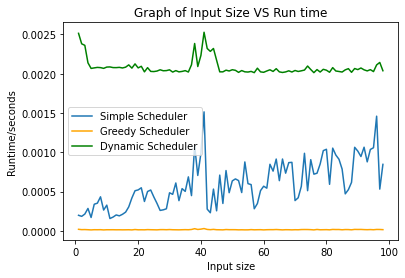

In [39]:
#removing some print statements cause errors so I have kept them while making plots

run_time_1 = []
run_time_2= []
run_time_3 = []
tracker = []
input_size = []
experiments = 50

for i in range(2, 100):
    no_exp = []
    for n in range(1,i):
        no_exp.append(Task(id = i-1, description = i, duration = random.randrange(50, 200), dependencies = [], end_time = random.randrange(1000, 10000)))
    tracker.append(no_exp)

for i in tracker:
    A = []
    B = []
    C = []
    
    for x in range(experiments):
        #A
        start = time.process_time()
        tasks_scheduler = TaskScheduler(i)
        tasks_scheduler.run_task_scheduler(start_scheduler)
        end = time.process_time()
        A.append(end-start)

        #B
        start = time.process_time()
        tasks_scheduler_2 = greedy_scheduler(optimized_week_tasks, 1000)
        end = time.process_time()
        B.append(end-start)       
        
        #C
        start = time.process_time()
        tasks_scheduler_3 = dynamic_scheduler(optimized_week_tasks, 1000)
        end = time.process_time()
        C.append(end-start)  

    input_size.append(len(i))
    
    run_time_1.append(sum(A)/experiments)
    run_time_2.append(sum(B)/experiments)
    run_time_3.append(sum(C)/experiments)

plt.plot( input_size, run_time_1, label='Simple Scheduler')
plt.plot( input_size, run_time_2, label='Greedy Scheduler', color = 'orange')
plt.plot( input_size, run_time_3, label='Dynamic Scheduler', color = 'green')
plt.xlabel('Input size')
plt.ylabel('Runtime/seconds')
plt.title('Graph of Input Size VS Run time')
plt.legend()

***Space Complexity Experiment***

Running a simple scheduler:

🕰t=8h00
	started '2' for 152 mins..., with a priority value of 8.4
	✅ t=10h32, task completed!

🏁 Completed all planned tasks in 2h32min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed all planned tasks in 0h00min!
Running a simple scheduler:


🏁 Completed

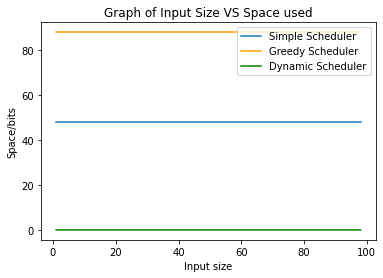

In [40]:
#removing some print statements cause errors so I have kept them while making plots

import sys

space_used_1 = []
space_used_2= []
space_used_3 = []
tracker_2 = []
input_size_2 = []
experiments = 50

for i in range(2, 100):
    no_exp_2 = []
    for n in range(1,i):
        no_exp_2.append(Task(id = i-1, description = i, duration = random.randrange(50, 200), dependencies = [], end_time = random.randrange(1000, 10000)))
    tracker_2.append(no_exp_2)

for i in tracker_2:
    A_2 = []
    B_2 = []
    C_2 = []
    
    for x in range(experiments):
        #A_2
        # should give you the full object size
        tasks_scheduler = TaskScheduler(i)
        tasks_scheduler.run_task_scheduler(start_scheduler)
        size_1 = sys.getsizeof(tasks_scheduler)
        A_2.append(size_1)

        #B_2
        tasks_scheduler_2 = greedy_scheduler(optimized_week_tasks, 1000)
        size_2 = sys.getsizeof(tasks_scheduler_2)
        B_2.append(size_2)       
        
        #C_2
        tasks_scheduler_3 = dynamic_scheduler(optimized_week_tasks, 1000)
        size_3 = sys.getsizeof(tasks_scheduler_3)
        C_2.append(size_3)  

    input_size_2.append(len(i))
    
    space_used_1.append(sum(A_2)/experiments)
    space_used_2.append(sum(B_2)/experiments)
    space_used_3.append(sum(C_2)/experiments)

plt.plot( input_size_2, space_used_1, label='Simple Scheduler')
plt.plot( input_size_2, space_used_2, label='Greedy Scheduler',  color = 'orange')
plt.plot( input_size, run_time_3, label='Dynamic Scheduler', color = 'green')
plt.xlabel('Input size')
plt.ylabel('Space/bits')
plt.title('Graph of Input Size VS Space used')
plt.legend()